# CREDIT CARD DECTECTION

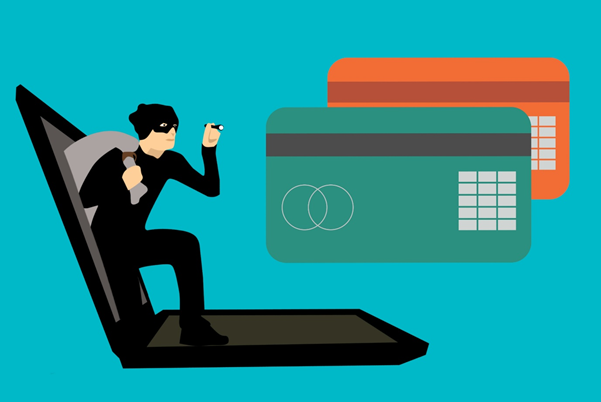

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\Data Science Project\\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

In [6]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
background_color = '#CCFF80'
color_palette=['#2769FE', '#FF5F57', '#4dad82', '#230F88', '#0E0330']

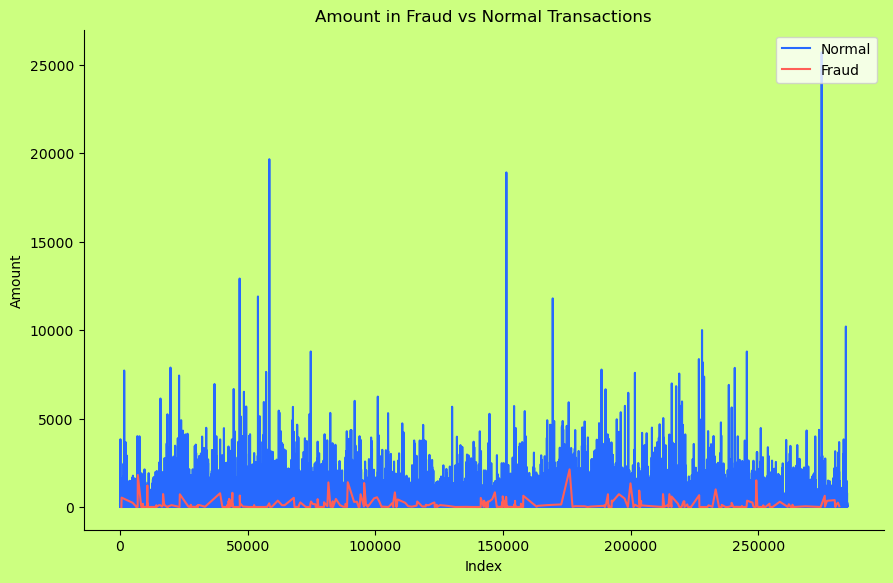

In [9]:
fig = plt.figure(figsize=(8, 5))

fig.set_facecolor(background_color)
plt.gca().set_facecolor(background_color)
ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
    
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.plot(normal['Amount'], label='Normal', color=color_palette[0])
plt.plot(fraud['Amount'], label='Fraud', color=color_palette[1])

plt.title('Amount in Fraud vs Normal Transactions')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.legend(loc='upper right')

plt.show()


In [10]:
fraud['Time'].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [11]:
normal['Time'].describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


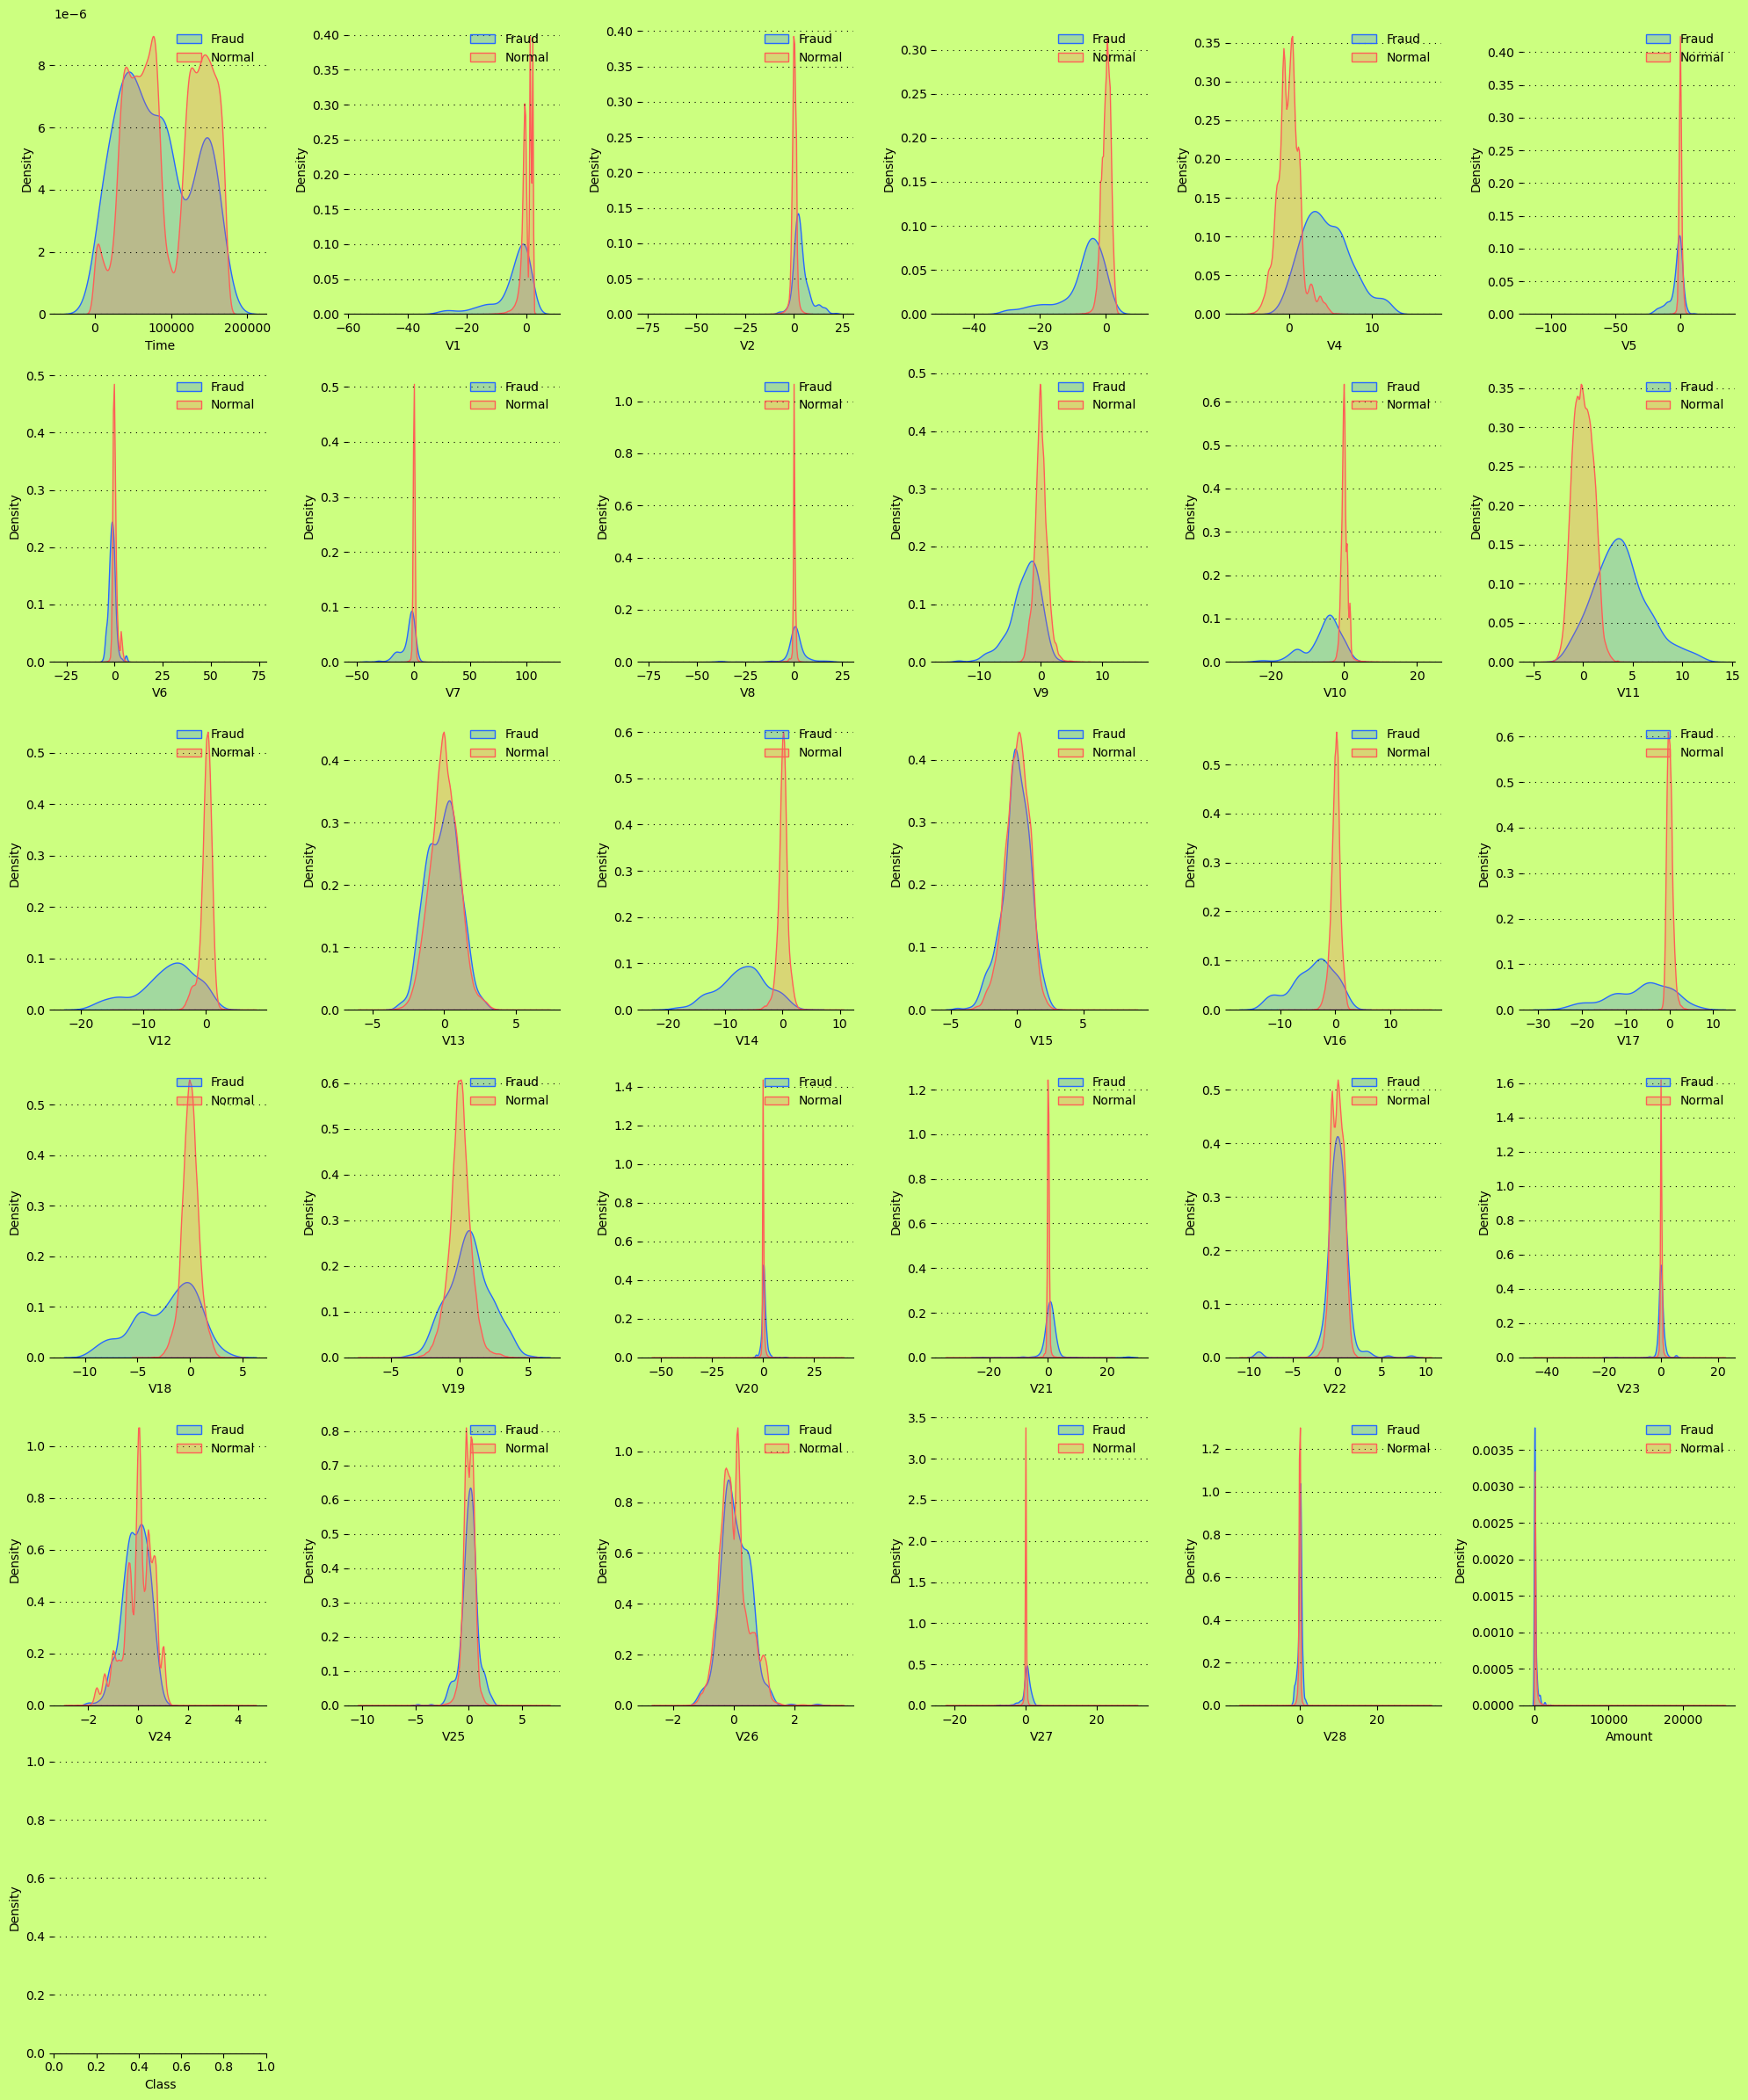

In [12]:
num_plots = len(fraud.columns)
num_cols = 6
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

fig = plt.figure(figsize=(20, num_rows * 4))
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(num_rows, num_cols)
axes = [fig.add_subplot(gs[i // num_cols, i % num_cols]) for i in range(num_plots)]

for ax, column in zip(axes, fraud.columns):
    sns.kdeplot(fraud[column], ax=ax, label='Fraud', fill=True, color=color_palette[0])
    sns.kdeplot(normal[column], ax=ax, label='Normal', fill=True, color=color_palette[1])
    # ax.set_title(column, fontweight='bold', fontfamily='serif')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    ax.set_facecolor(background_color)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
    ax.legend(loc='upper right', frameon=False)

if num_plots % num_cols != 0:
    for ax in axes[num_plots:]:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

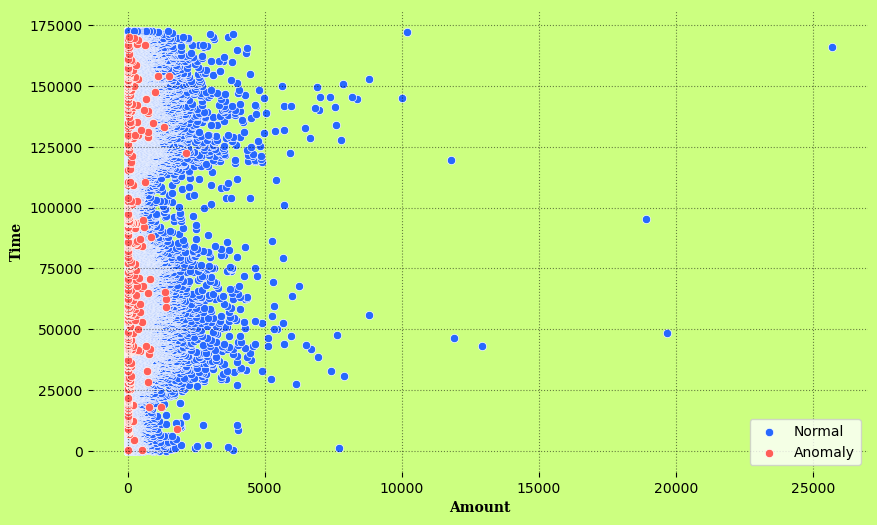

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

sns.scatterplot(data=normal, x='Amount', y='Time', color=color_palette[0], label='Normal', ax=ax)
sns.scatterplot(data=fraud, x='Amount', y='Time', color=color_palette[1], label='Anomaly', ax=ax)

ax.set_xlabel('Amount', fontweight='bold', fontfamily='serif')
ax.set_ylabel('Time', fontweight='bold', fontfamily='serif')
ax.legend()

ax.tick_params(left=True, bottom=True)
ax.grid(True, color='#000000', linestyle=':', alpha=0.5)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.show()


In [15]:
new_data = pd.concat([fraud, normal.sample(n=len(fraud))], axis=0)
new_data = new_df.sample(frac=1).reset_index(drop=True)
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

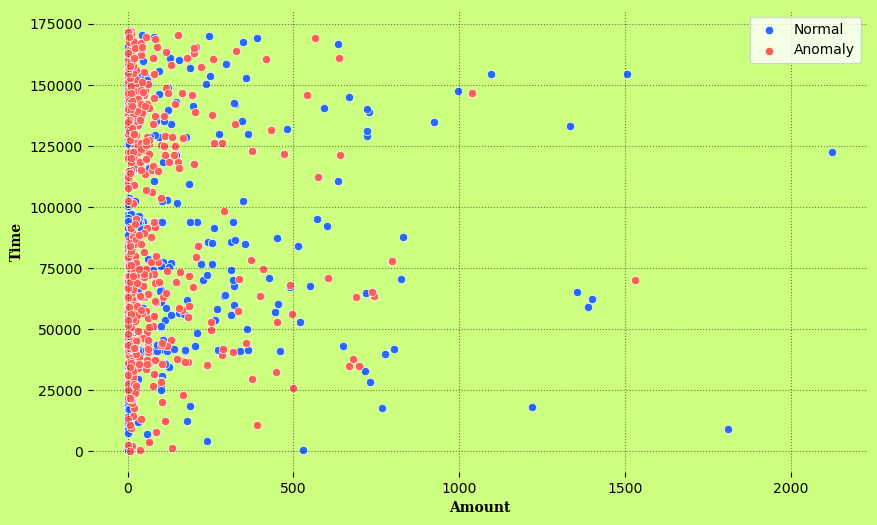

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

sns.scatterplot(data=new_df[new_df['Class'] == 1], x='Amount', y='Time', color=color_palette[0], label='Normal', ax=ax)
sns.scatterplot(data=new_df[new_df['Class'] == 0], x='Amount', y='Time', color=color_palette[1], label='Anomaly', ax=ax)

ax.set_xlabel('Amount', fontweight='bold', fontfamily='serif')
ax.set_ylabel('Time', fontweight='bold', fontfamily='serif')
ax.legend()

ax.tick_params(left=True, bottom=True)
ax.grid(True, color='#000000', linestyle=':', alpha=0.5)

for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


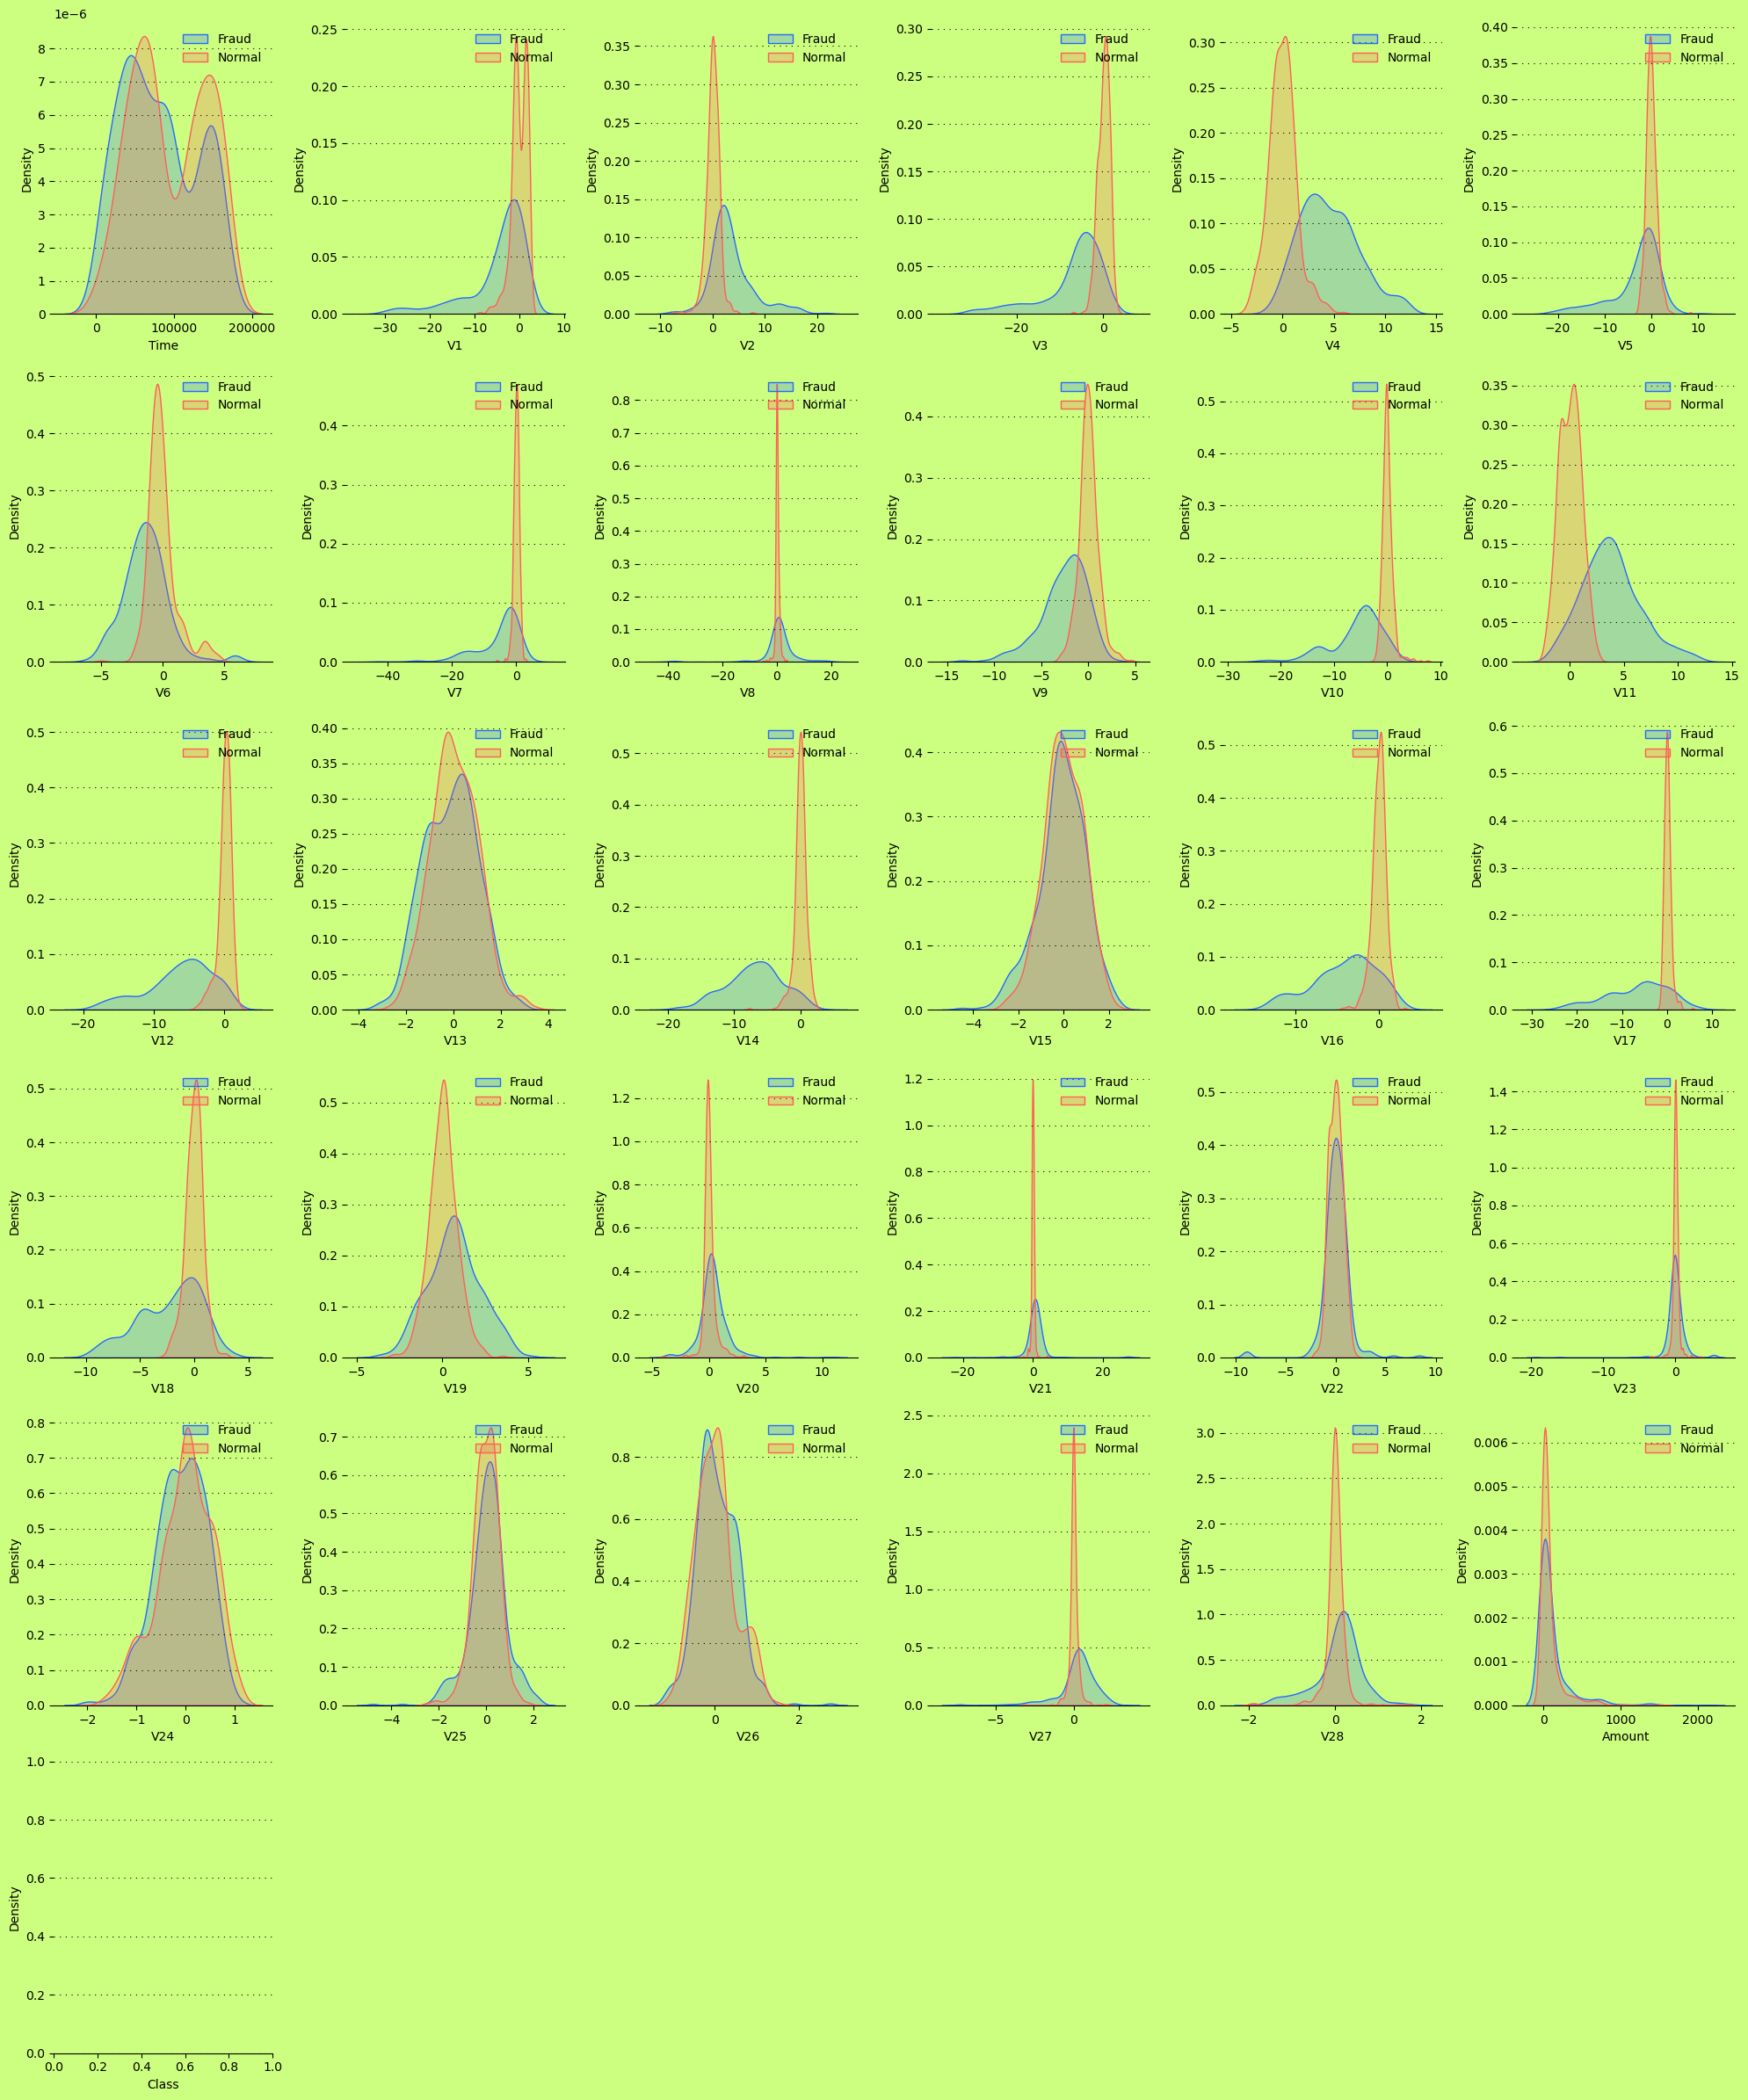

In [17]:
fraud = new_df[new_df['Class'] == 1]
normal = new_df[new_df['Class'] == 0]

num_plots = len(fraud.columns)
num_cols = 6
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

fig = plt.figure(figsize=(20, num_rows * 4))
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(num_rows, num_cols)
axes = [fig.add_subplot(gs[i // num_cols, i % num_cols]) for i in range(num_plots)]

for ax, column in zip(axes, fraud.columns):
    sns.kdeplot(fraud[column], ax=ax, label='Fraud', fill=True, color=color_palette[0])
    sns.kdeplot(normal[column], ax=ax, label='Normal', fill=True, color=color_palette[1])
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    ax.set_facecolor(background_color)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
    ax.legend(loc='upper right', frameon=False)

if num_plots % num_cols != 0:
    for ax in axes[num_plots:]:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# the kde plot of anomalies should not be similar to the kde plot of the original data so we handpick the features that does not look similar

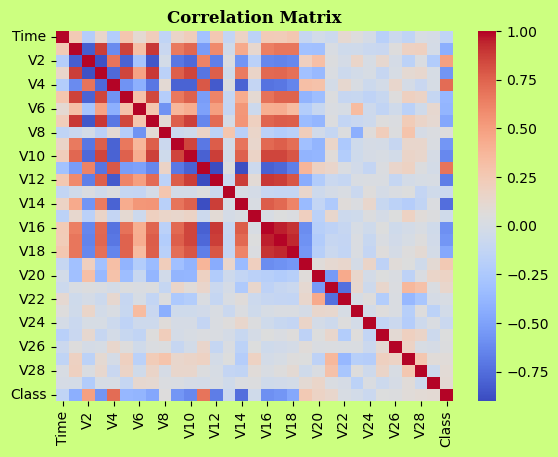

In [25]:
# Create a figure and an axes
fig, ax = plt.subplots()
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_title('Correlation Matrix', fontweight='bold', fontfamily='serif')
sns.heatmap(new_df.corr(), cmap='coolwarm', ax=ax)


plt.show()

In [26]:
special_columns = ['V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']
highly_correlated = ['V1', 'V3', 'V5', 'V6', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18']

# MODEL BUILDING 

In [27]:
x = new_df.loc[:, special_columns + ['Time']]
y = new_df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        92
           1       0.96      0.88      0.92       105

    accuracy                           0.91       197
   macro avg       0.91      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197



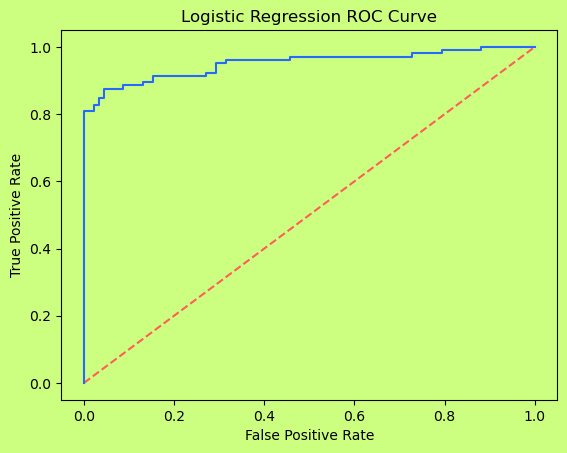

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = log_reg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

fig, ax = plt.subplots()
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

plt.plot([0, 1], [0, 1], 'k--', color=color_palette[1]) 
plt.plot(fpr, tpr, label='Logistic Regression', color=color_palette[0]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show()

In [31]:
progress_df = data[special_columns + ['Class', 'Time']].sample(frac=0.5)
progress_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142404 entries, 16404 to 125208
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V10     142404 non-null  float64
 1   V11     142404 non-null  float64
 2   V12     142404 non-null  float64
 3   V14     142404 non-null  float64
 4   V16     142404 non-null  float64
 5   V17     142404 non-null  float64
 6   V18     142404 non-null  float64
 7   Class   142404 non-null  int64  
 8   Time    142404 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 10.9 MB


In [32]:
progress_df['Class'].value_counts()

Class
0    142166
1       238
Name: count, dtype: int64

In [33]:
# try testing the model on the half dataset
x = progress_df.loc[:, special_columns + ['Time']]
y = progress_df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

y_pred = log_reg.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    113736
           1       0.05      0.90      0.09       187

    accuracy                           0.97    113923
   macro avg       0.52      0.94      0.54    113923
weighted avg       1.00      0.97      0.98    113923



In [36]:
# test the data in origianl df

x = data.loc[:, special_columns + ['Time']]
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

y_pred = log_reg.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    255880
           1       0.05      0.89      0.09       446

    accuracy                           0.97    256326
   macro avg       0.52      0.93      0.54    256326
weighted avg       1.00      0.97      0.98    256326

